# Linear Regreassion Using Pytorch

This tutorial will cover the process of developing a Regression Model using Pytorch.
Will go over the following steps:

1. **Regression Models**

![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/TypesOfRegressionModels.png?raw=1)

2. **Correlation and its relation to Regression**

![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/correlationPlots.png?raw=1)

3. **Regression Coeficient Computation**

4. **t-test**
  
Jupyter Notebook

5. **Synthetic data generation**


In Python code, the import statement will allow the current module to access the code of another model (somehow similar the include operation in C/C++).

When invoking the import statement, the current module serches for the named module and bind it to the name selected in the local scope.

Here we are importing:

 **matplotlib.pyplot :**

 **numpy :**

 **torch :**

 **torch.utils.data :**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset

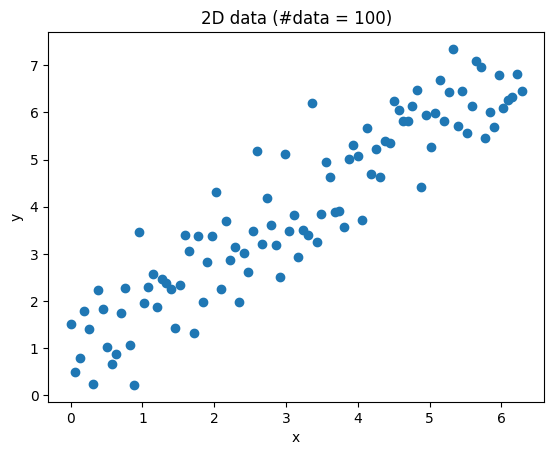

In [ ]:
N = 100 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.7,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [ ]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]),
            'label': torch.tensor([self.y[idx]])}
        return sample

![image](https://github.com/loukilitarik2020/Regression-Model/blob/main/Tensor.png?raw=1)

In [ ]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.5143], dtype=torch.float64)
1 tensor([1.0000, 0.0635], dtype=torch.float64) tensor([0.5069], dtype=torch.float64)
2 tensor([1.0000, 0.1269], dtype=torch.float64) tensor([0.7860], dtype=torch.float64)
3 tensor([1.0000, 0.1904], dtype=torch.float64) tensor([1.7967], dtype=torch.float64)
4 tensor([1.0000, 0.2539], dtype=torch.float64) tensor([1.4039], dtype=torch.float64)
5 tensor([1.0000, 0.3173], dtype=torch.float64) tensor([0.2404], dtype=torch.float64)
6 tensor([1.0000, 0.3808], dtype=torch.float64) tensor([2.2386], dtype=torch.float64)
7 tensor([1.0000, 0.4443], dtype=torch.float64) tensor([1.8365], dtype=torch.float64)
8 tensor([1.0000, 0.5077], dtype=torch.float64) tensor([1.0289], dtype=torch.float64)
9 tensor([1.0000, 0.5712], dtype=torch.float64) tensor([0.6770], dtype=torch.float64)
10 tensor([1.0000, 0.6347], dtype=torch.float64) tensor([0.8794], dtype=torch.float64)
11 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.74

In [ ]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [ ]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 5.6485],
        [1.0000, 2.6021],
        [1.0000, 0.1269],
        [1.0000, 1.7771]], dtype=torch.float64),
 'label': tensor([[7.0984],
        [5.1708],
        [0.7860],
        [3.3823]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 1.8405],
        [1.0000, 4.9504],
        [1.0000, 2.7291],
        [1.0000, 1.3328]], dtype=torch.float64),
 'label': tensor([[1.9898],
        [5.9508],
        [4.1862],
        [2.3813]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 0.9520],
        [1.0000, 1.6501],
        [1.0000, 4.8235],
        [1.0000, 0.0635]], dtype=torch.float64),
 'label': tensor([[3.4636],
        [3.0625],
        [6.4824],
        [0.5069]], dtype=torch.float64)}

batch# = 3
samples: 
{'feature': tensor([[1.0000, 0.0000],
        [1.0000, 4.5696],
        [1.0000, 2.1579],
        [1.0000, 3.6176]], dtype=torch.float64),
 'label': tensor([[1.5143],
        [6.05

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [ ]:
cost = nn.MSELoss()

In [ ]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        # Convert the 'feature' tensor to float32
        samples['feature'] = samples['feature'].type(torch.float32)
        # Convert the 'label' tensor to float32
        samples['label'] = samples['label'].type(torch.float32)
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])

        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 18.831266403198242
	Batch = 1, Error = 5.439289093017578
	Batch = 2, Error = 5.7606401443481445
	Batch = 3, Error = 3.2888994216918945
	Batch = 4, Error = 1.1358753442764282
	Batch = 5, Error = 0.6527478694915771
	Batch = 6, Error = 1.5446757078170776
	Batch = 7, Error = 0.1590583622455597
	Batch = 8, Error = 0.28050753474235535
	Batch = 9, Error = 0.2766648828983307
	Batch = 10, Error = 0.8718944191932678
	Batch = 11, Error = 1.526728868484497
	Batch = 12, Error = 0.27486079931259155
	Batch = 13, Error = 0.35314303636550903
	Batch = 14, Error = 0.34274977445602417
	Batch = 15, Error = 0.41738951206207275
	Batch = 16, Error = 0.2908813953399658
	Batch = 17, Error = 0.1335790902376175
	Batch = 18, Error = 0.4244517683982849
	Batch = 19, Error = 0.32427865266799927
	Batch = 20, Error = 0.6365951299667358
	Batch = 21, Error = 0.46390798687934875
	Batch = 22, Error = 0.6151523590087891
	Batch = 23, Error = 0.24784258008003235
	Batch = 24, Error = 0.53082710504

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


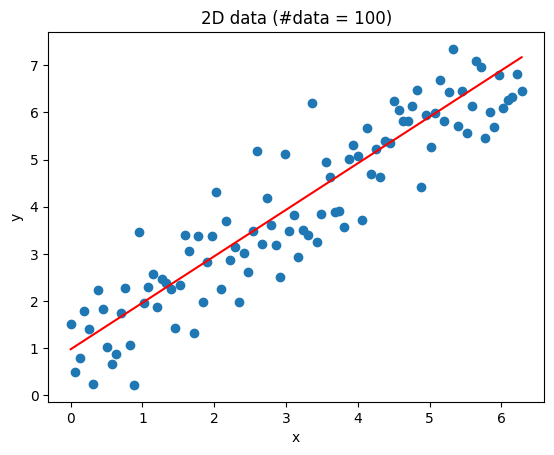

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()